In [1]:
## ANALISIS COVID IMPACT DI BANDARA 

In [1]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm
from datetime import datetime
import glob
import os
import pickle
import six
import re
import nltk
nltk.download('stopwords')
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data = pd.read_csv('covid_impact_on_airport_traffic.csv')
data.head(30)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
5,Daily,2020-04-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
6,Daily,2020-05-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
7,Daily,2020-07-04,1.0,Kingsford Smith,48,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
8,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
9,Daily,2020-11-20,1.0,Kingsford Smith,27,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [3]:
data['Date']=pd.to_datetime(data['Date'].astype(str), format='%Y/%m/%d')

In [4]:
data.dtypes

AggregationMethod            object
Date                 datetime64[ns]
Version                     float64
AirportName                  object
PercentOfBaseline             int64
Centroid                     object
City                         object
State                        object
ISO_3166_2                   object
Country                      object
Geography                    object
dtype: object

In [22]:
data_gn = data.rename(columns={'AggregationMethod':'Metode Agresi', 'Date':'Tanggal','Version':'Versi','AirportName':'Bandara',
                                'PercentOfBaseline':'Persentase','Centroid':'Koordinat','City':'Kota','State':'Provinsi',
                               'ISO_3166_2':'Inisial','Country':'Negara','Geography':'Geografi'
                                })
data_gn.head(30)

,Metode Agresi,Tanggal,Versi,Bandara,Persentase,Koordinat,Kota,Provinsi,Inisial,Negara,Geografi
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
5,Daily,2020-04-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
6,Daily,2020-05-14,1.0,Kingsford Smith,59,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
7,Daily,2020-07-04,1.0,Kingsford Smith,48,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
8,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
9,Daily,2020-11-20,1.0,Kingsford Smith,27,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


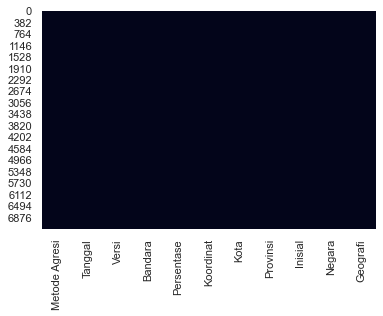

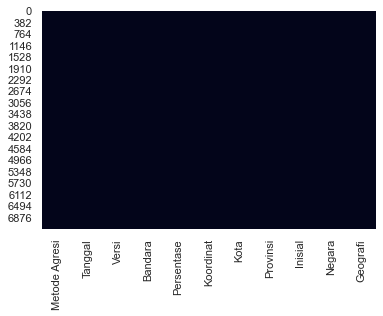

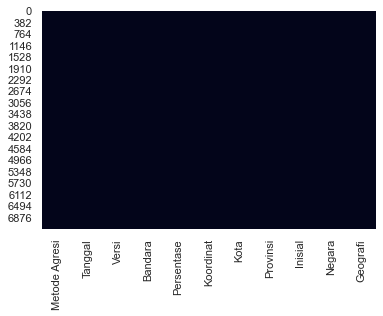

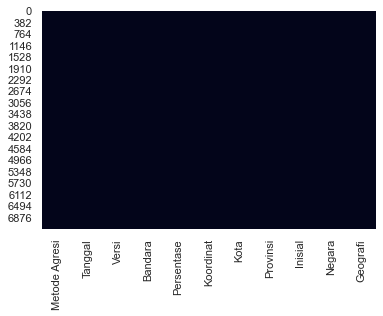

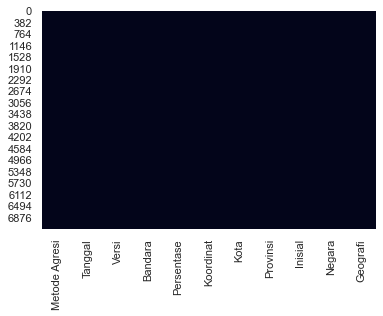

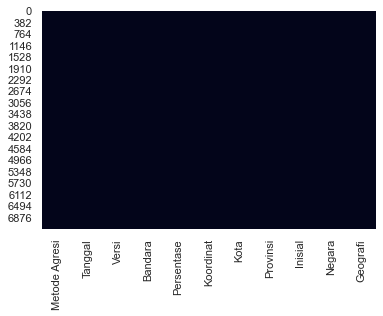

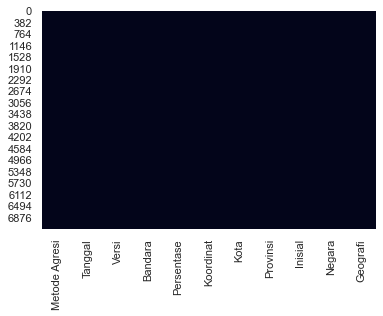

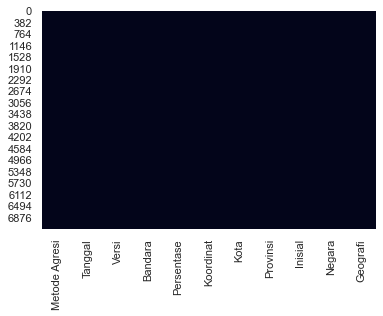

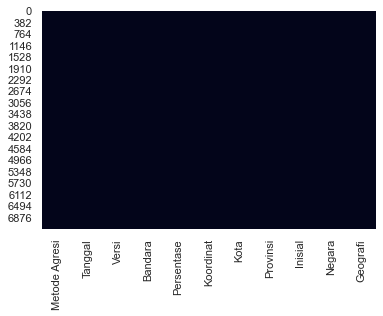

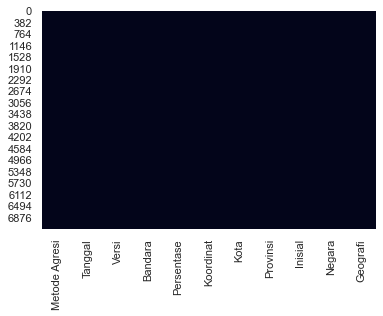

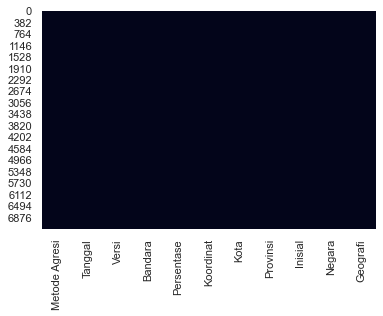

<Figure size 432x288 with 0 Axes>

In [6]:
# Use Heatmap no missing value and result there is no missing values 
for df in data_gn:
    sns.heatmap(data_gn.isnull(), cbar=False)
    plt.figure()

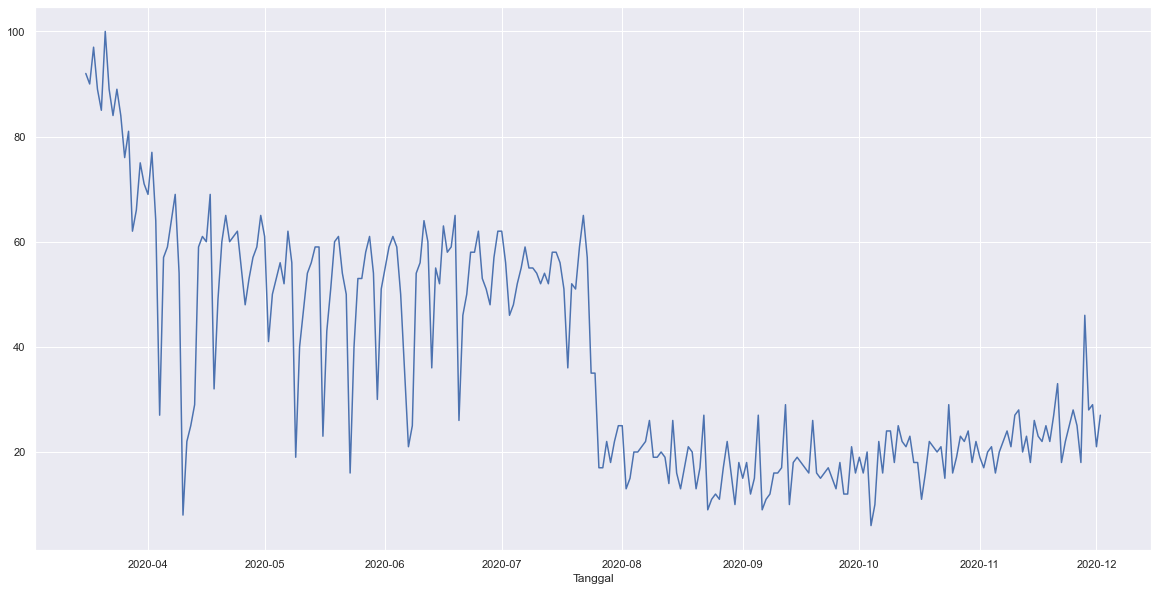

In [7]:
#See every daily how is the progress of percent of baseline IN AUSSIE 
data_au = data_gn.head(257)
data_gb_au = data_au.groupby('Tanggal', as_index=False).sum()
udah_drop_gb_au = data_gb_au.drop(['Versi'], axis=1)
udah_drop_gb_au
plt.figure(figsize=(20,10))
plt.plot(udah_drop_gb_au['Tanggal'], udah_drop_gb_au['Persentase'])
plt.xlabel('Tanggal')
plt.show()
#Get the result covid make a big impact for airport see the date percent of baseline decrease every day everymonth in 2020

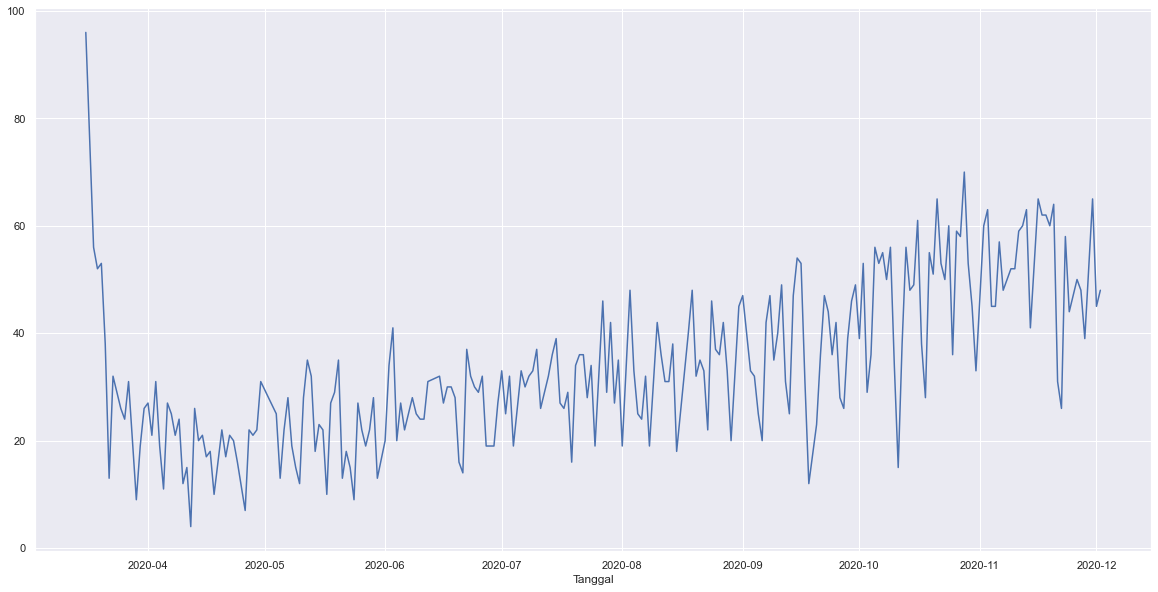

In [8]:
data_ch = data_gn.iloc[258:495]
data_gb_ch = data_ch.groupby('Tanggal',as_index=False).sum()
udah_data_gb_ch = data_gb_ch.drop(['Versi'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(udah_data_gb_ch['Tanggal'], udah_data_gb_ch['Persentase'])
plt.xlabel('Tanggal')
plt.show()
# data in chile stabil 

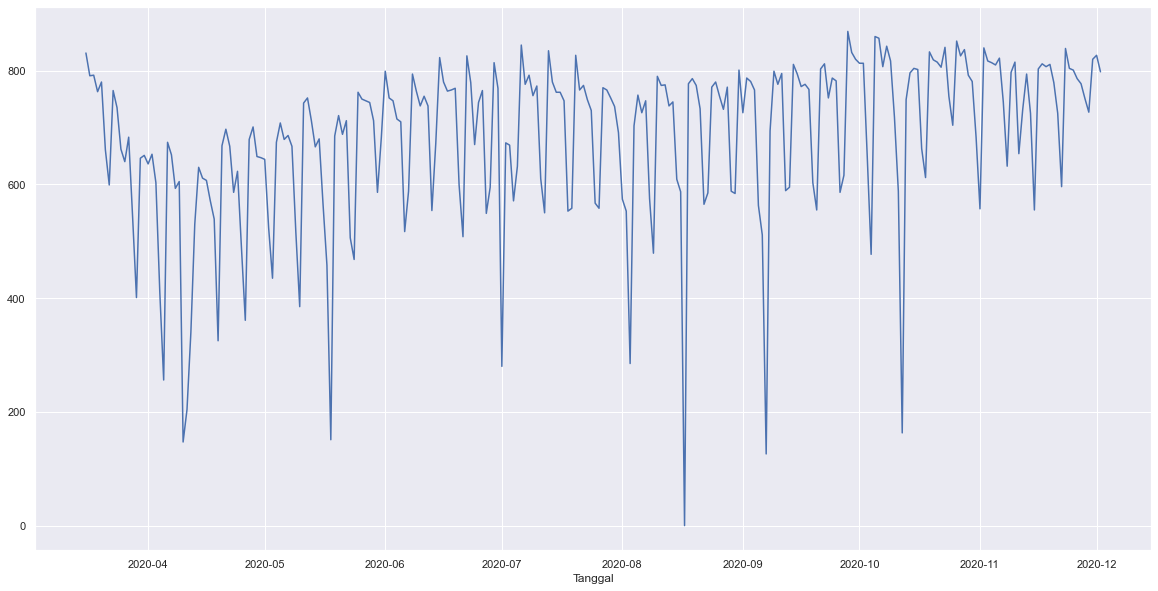

In [9]:
data_cn = data_gn.iloc[495:2806]
data_gb_cn = data_cn.groupby('Tanggal',as_index=False).sum()
udah_data_gb_cn = data_gb_cn.drop(['Versi'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(udah_data_gb_cn['Tanggal'], udah_data_gb_cn['Persentase'])
plt.xlabel('Tanggal')
plt.show()
#And the Result for canada everryday, everymonth is increase 

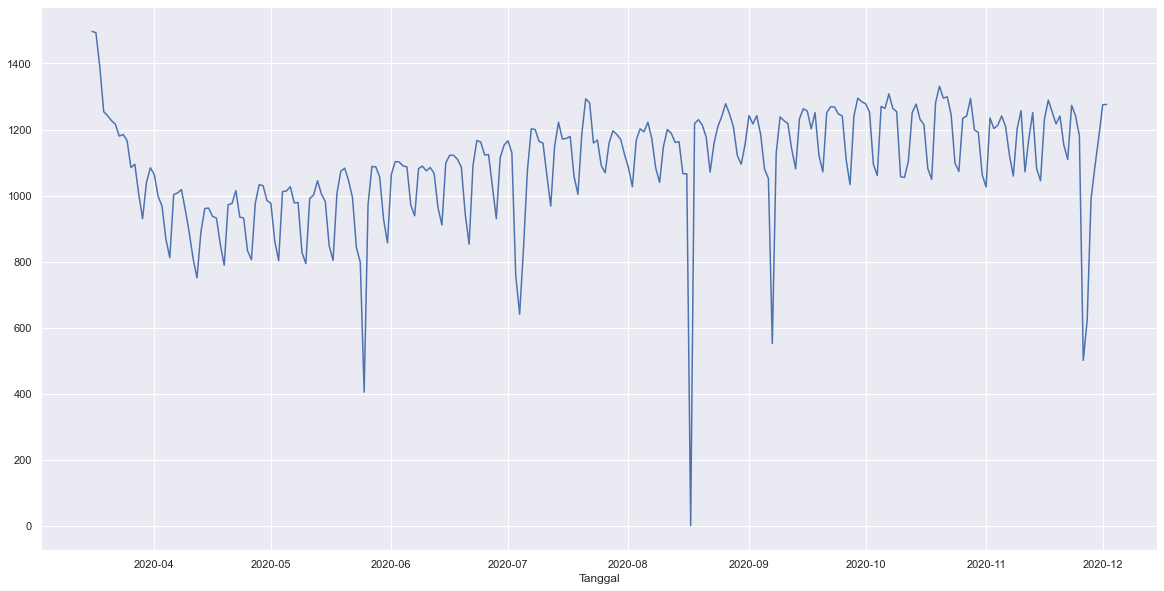

In [10]:
data_us = data_gn.iloc[2806:]
data_gb_us = data_us.groupby('Tanggal',as_index=False).sum()
udah_data_gb_us = data_gb_us.drop(['Versi'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(udah_data_gb_us['Tanggal'], udah_data_gb_us['Persentase'])
plt.xlabel('Tanggal')
plt.show()
#And the Result for Amerika everryday, everymonth is increase 

In [11]:
## MEMBUAT GRAFIK BOX PLOT 
#see the median, maximun , quartil, minimum 
# QUESTION 1 
# Which airport has a high percent of baseline ?

<AxesSubplot:xlabel='Persentase', ylabel='Bandara'>

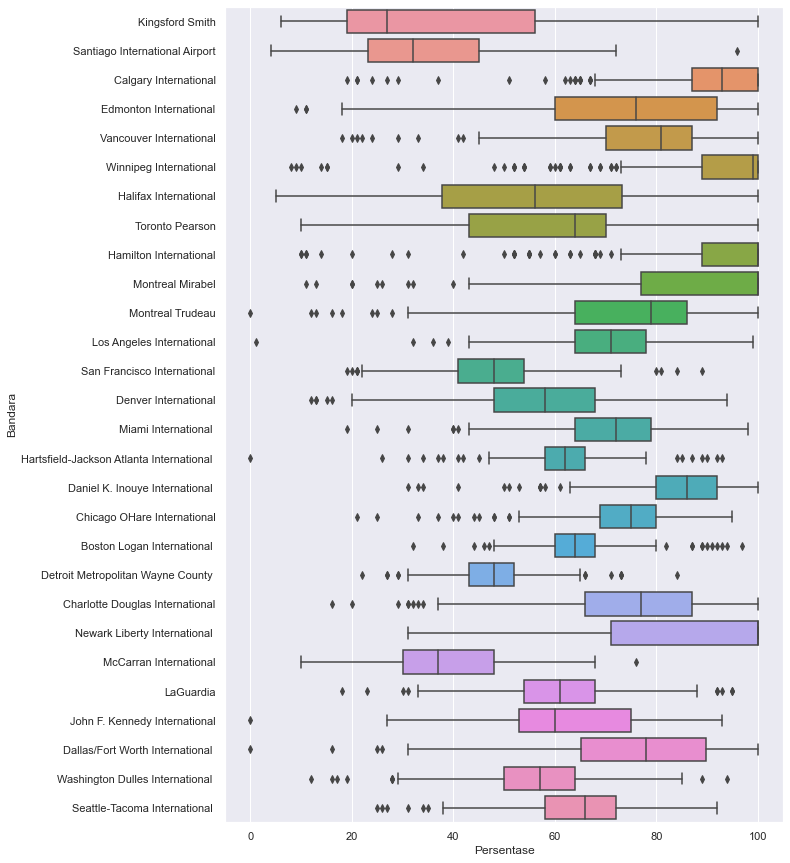

In [12]:
plt.subplots(figsize=(10, 15))
sns.boxplot(x='Persentase',y='Bandara', data=data_gn) 

In [13]:
# And the result is newark liberty international its highest percent of baseline ther is no median and down quartil there 
#is available in there. 

<AxesSubplot:xlabel='Negara', ylabel='Persentase'>

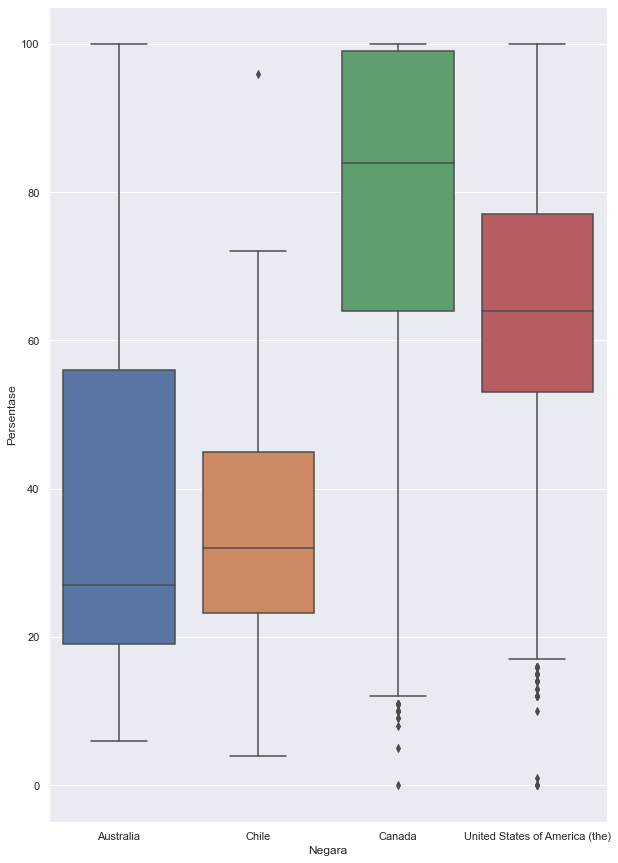

In [14]:
# QUESTION 2 
# Which country has a highest percent of baseline ? 
plt.subplots(figsize=(10, 15))
sns.boxplot(x='Negara',y='Persentase', data=data_gn)

In [15]:
#The result is Canada. 

In [16]:
# Make bandara become coloumn not indeks
gb = data_gn.groupby('Bandara', as_index=False).mean()
bandara_gb =gb.drop(['Versi'],axis=1)
bandara_gb

,Bandara,Persentase
0,Boston Logan International,64.704981
1,Calgary International,89.513410
2,Charlotte Douglas International,75.375479
3,Chicago OHare International,73.084291
4,Dallas/Fort Worth International,75.293893
5,Daniel K. Inouye International,84.628352
6,Denver International,56.095785
7,Detroit Metropolitan Wayne County,47.432950
8,Edmonton International,74.305085
9,Halifax International,57.154762


<AxesSubplot:xlabel='Persentase', ylabel='Bandara'>

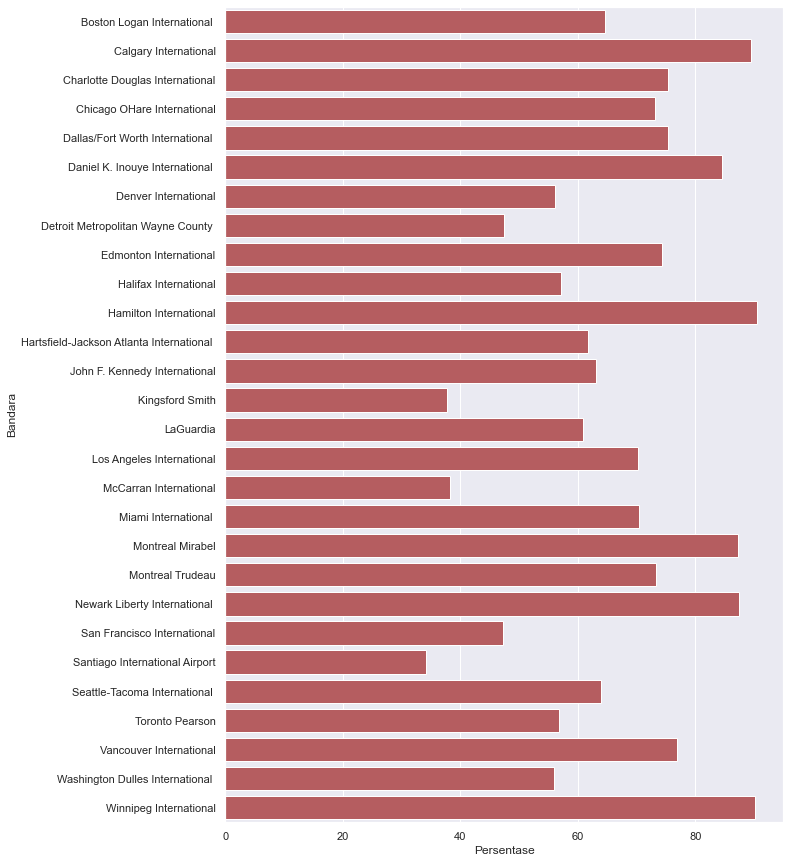

In [17]:
# Get the grafic from groupby to display all airport 
bandara_gb.columns = ['Bandara','Persentase']
plt.subplots(figsize=(10, 15))
sns.barplot(x="Persentase", y="Bandara", data=bandara_gb,
            label="-", color="r")

In [18]:
#GROUP BY NEGARA 
gb = data_gn.groupby('Negara', as_index=False).mean()
negara_gb =gb.drop(['Versi'],axis=1)
negara_gb

,Negara,Persentase
0,Australia,37.750973
1,Canada,77.409347
2,Chile,34.273109
3,United States of America (the),64.460932


<AxesSubplot:xlabel='Persentase', ylabel='Negara'>

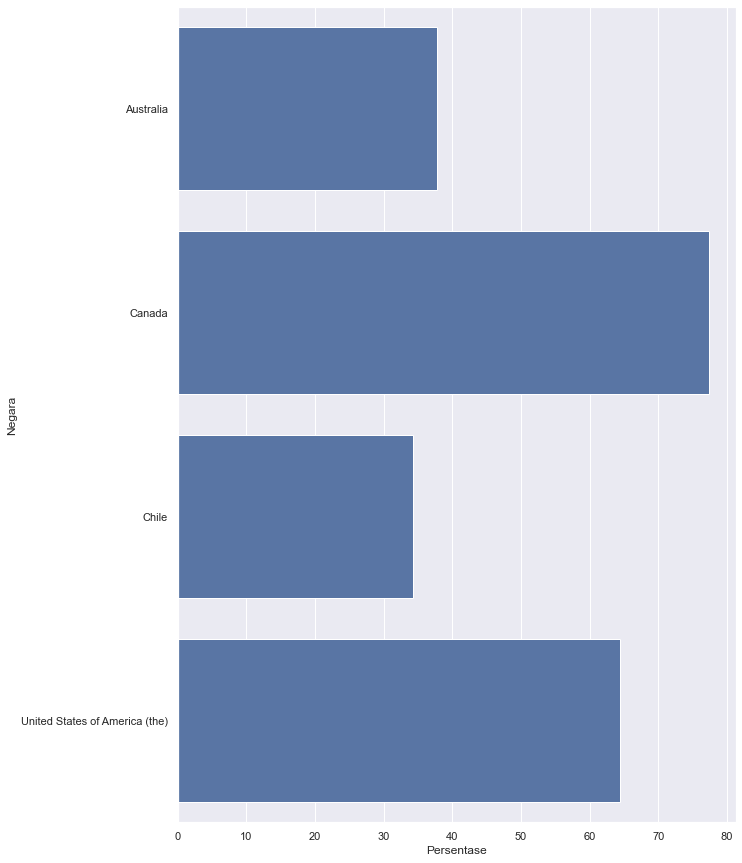

In [19]:
# AND GET THE GRAFIC 
negara_gb.columns = ['Negara','Persentase']
plt.subplots(figsize=(10, 15))
sns.barplot(x="Persentase", y="Negara", data=negara_gb,
            label="-", color="b")

In [20]:
#top 5 percent of baseline 
temporary = []
for df in data_gn:
    temp = df
    temp = data_gn.sort_values(by = ['Persentase'], ascending=False)
    temp.drop_duplicates(subset ="Bandara", keep = 'first', inplace = True)
    temp.set_index('Bandara', inplace=True)
    temp = temp.head() 
    temporary.append(temp)
temporary[2][['Versi', 'Kota', 'Provinsi', 'Negara', 'Persentase']]

,Versi,Kota,Provinsi,Negara,Persentase
Bandara,,,,,
Newark Liberty International,1.0,Newark,New Jersey,United States of America (the),100
Hamilton International,1.0,Hamilton,Ontario,Canada,100
Edmonton International,1.0,Leduc County,Alberta,Canada,100
Daniel K. Inouye International,1.0,Urban Honolulu,Hawaii,United States of America (the),100
Charlotte Douglas International,1.0,Charlotte,North Carolina,United States of America (the),100


In [ ]:
#and the result five aiport with highest percent of baseline is Newark Liberty International, and country with higshest percent 
#of baseline is canada and followed with lowest percent of baseline is Aussie. 